In [2]:
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from scipy import signal
from scipy.signal import find_peaks
import copy
from scipy.signal import butter, filtfilt
from scipy.signal import czt
import csv

In [3]:
def readCsv(pathFile):
    arrays = []

    with open(pathFile, 'r') as file:
        # Read the lines of the file
        lines = file.readlines()
        for line in lines:
            line_values = line.strip().split(',')
            arrays.append(line_values)
    complex_array = []
    for array in arrays:

        complex_value = np.array(
            [complex(element.replace('i', 'j')) for element in array])
        complex_array.append(complex_value)
    np.array(complex_array)
    return np.array(complex_array)


300.0


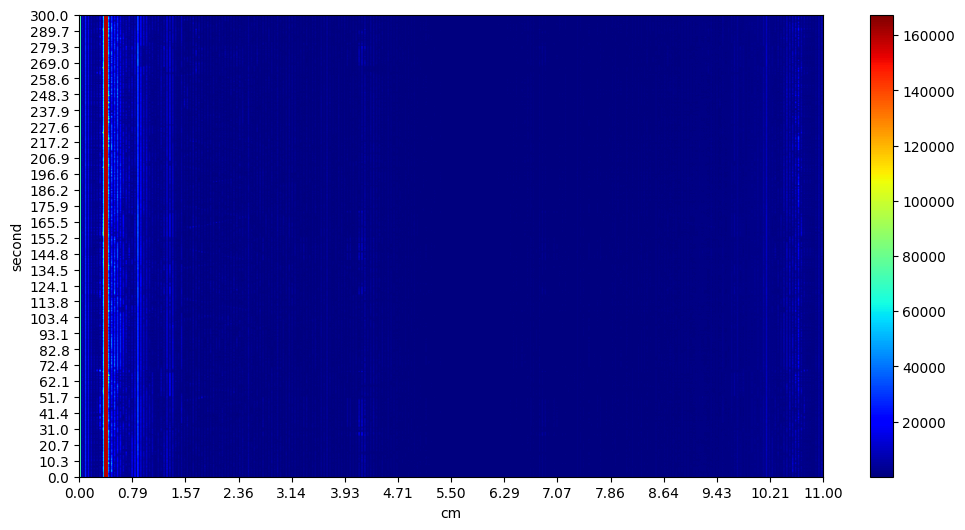

In [6]:
NUMBER_OF_SAMPLE_PER_FRAME = 512
for i in range(1,2):
    file_path = './FMCW Radar/Rawdata/Rawdata_{0}.csv'.format(i)
    raw_data = readCsv(file_path)
    raw_data_channel_0 = raw_data[0]

    frames = [raw_data_channel_0[i:i+NUMBER_OF_SAMPLE_PER_FRAME] for i in range(0, len(raw_data_channel_0), NUMBER_OF_SAMPLE_PER_FRAME)]
    fft_frames = [np.fft.fft(frame) for frame in frames]
    magnitude_spectrums = [np.abs(fft_frame) for fft_frame in fft_frames]

    # x= np.arange(0,11,11/len(magnitude_spectrums[0]))
    # plt.plot(x,magnitude_spectrums[0])
    # plt.plot(x,magnitude_spectrums[1])
    # plt.plot(x,magnitude_spectrums[1])
    # plt.xlabel('meters')
    # plt.ylabel('Amplitude')
    # plt.show()

    max_indices  = np.zeros(shape=len(magnitude_spectrums[0]),dtype=int)
    for magnitude_spectrum in magnitude_spectrums:
        m_index=np.argmax(magnitude_spectrum[1:-1])
        max_indices[m_index] = max_indices[m_index]+1
    max_index= np.argmax(max_indices)
    
    tmp_array= copy.deepcopy(magnitude_spectrums)
    for tmp in tmp_array:
        tmp[max_index]=160000
        tmp[max_index+1]=160000
        tmp[max_index+2]=160000
    plt.figure(figsize=(12, 6))
    xmin=0
    xmax=11
    x = np.linspace(xmin, xmax, 15)
    ymin=0
    ymax=len(tmp_array)/20 #6000 chirp ~6000 frame each second has 20 frame -> second
    #ymax ~300s ~5mins
    print(ymax)
    y = np.linspace(ymin, ymax, 30)
    plt.xticks(x)
    plt.yticks(y)

    plt.imshow(tmp_array, cmap='jet', aspect='auto',extent=[xmin,xmax,ymin,ymax])
    plt.xlabel('cm')
    plt.ylabel('second')
    plt.colorbar()
    plt.show()

